(DUALIDAD)=

# 4.4 Dualidad

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion_2 -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

*

```

## Ejemplo prototipo

Considérese el problema planteado en {ref}`ejemplo prototipo <EJPROTOTIPO>` con sus suposiciones. El objetivo es elegir los valores de $x_1, x_2$ que maximicen $f_o$, la utilidad o ganancia totales, sujeta a las restricciones impuestas sobre sus valores por las capacidades de producción limitadas disponibles en las tres plantas. Esto es, resolver el PL siguiente:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

El término $3x_1$ representa la ganancia generada (en miles de pesos) cuando se fabrica el producto 1 a una tasa de $x_1$ lotes por semana. Se tienen contribuciones individuales de cada producto a la ganancia. maximizar las 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

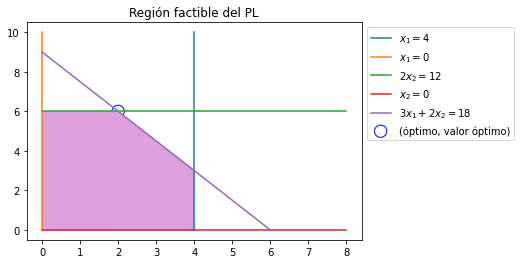

In [6]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)
plt.scatter(2, 6, marker='o', s=150,
            facecolors='none', edgecolors='b')
plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$", "(óptimo, valor óptimo)"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


```{admonition} Definición

Asociado a todo problema de programación lineal existe otro problema lineal con nombre **dual**. Al problema "original" se le nombra **primal**.

```

```{admonition} Observación
:class: tip

Realmente no importa a cuál de los problemas se le dé el nombre primal y a cuál el de dual. La convención es que el modelo que se formula para representar el problema real recibe el nombre de problema primal no importando la forma que tiene (estándar u otra).

```

El problema **primal** anterior escrito en notación vectorial y matricial es:

$$\displaystyle \max_{x \in \mathbb{R}^2} (-c)^Tx$$

$$\text{sujeto a: }$$

$$Ax \leq b$$

$$x \geq 0$$

donde: $
A= 
\left [
\begin{array}{cc}
1 & 0 \\
0 & 2 \\
3 & 2 \\
\end{array}
\right ], x=
\left [
\begin{array}{c}
x_1 \\
x_2 \\
\end{array}
\right ], b=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]$ y 
$c = \left [ \begin{array}{c} -3 \\ -5 \end{array}\right]$ representa al vector de costos unitarios o equivalentemente $-c$ el vector de ganancias unitarias. La última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero. El PL busca maximizar $f_o(x) = -c^Tx$, la ganancia total.

```{admonition} Comentario

En el contexto del PL ejemplo se tiene:

$f_o$: ganancia total debida a todas las actividades (función objetivo).

$x_j$: nivel de la actividad $j$ con $j=1, 2, \dots, n$ (variables de optimización primales). En el ejemplo $n=2$.

$c_j$: costo unitario debido a la actividad j con $j=1, 2, \dots, n$ ($-c_j$ es la ganancia unitaria).

$b_i$: cantidad disponible del recurso $i$ para asignarse a las actividades con $i=1, 2, \dots, m$. En el ejemplo $m=3$.

$a_{ij}$: cantidad del recurso $i$ consumido por cada unidad de la actividad $j$ con $i=1, 2, \dots n$, $j=1, 2, \dots m$.

```

El problema **dual** asociado al problema anterior es:

$$\displaystyle \min_{\lambda \in \mathbb{R}^3} (-\lambda)^T b$$

$$\text{sujeto a: }$$

$$A^T(-\lambda) \geq -c$$

$$-\lambda \geq 0$$

Que escrito con escalares es:

$$\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3$$

$$\text{sujeto a: }$$

$$-\lambda_1 -3 \lambda_3 \geq 3$$

$$-2 \lambda_2 - 2 \lambda_3 \geq 5$$

$$\lambda_1 \leq 0, \lambda_2 \leq 0, \lambda_3 \leq 0$$

En su forma estándar es:

$$\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3$$

$$-\lambda_1 -3 \lambda_3 + \lambda_4 = 3$$

$$-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5$$

$$-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0, -\lambda_4 \geq 0, -\lambda_5 \geq 0$$

```{margin}
$\begin{align*}
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 
&&
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: }       &&  \text{sujeto a: }\\
x_1 \leq 4 \nonumber    &&  -\lambda_1 -3 \lambda_3 \geq 3\\
2x_2 \leq 12            && -2 \lambda_2 - 2 \lambda_3 \geq 5 \\
3x_1 + 2x_2 \leq 18     && -\lambda_1 \geq 0 \\
x_1 \geq 0              && -\lambda_2 \geq 0 \\
x_2 \geq 0              && -\lambda_3 \geq 0
\end{align*}$
```

```{admonition} Comentarios

* Por ahora tómese como válida la expresión del problema dual anterior, en esta primera parte se busca señalar las relaciones existentes con el problema primal.

* El problema dual usa exactamente los mismos parámetros del problema primal pero en diferentes lugares:

    * Los coeficientes de la función objetivo del problema primal son los lados derechos de las restricciones funcionales del problema dual.
    
    * Los lados derechos de las restricciones funcionales del problema primal son los coeficientes de la función objetivo del problema dual.
    
    * Los coeficientes de una variable de las restricciones funcionales del problema primal son los coeficientes de una restricción funcional del problema dual. Por ejemplo: de las restricciones funcionales $x_1 \leq 4$, $2x_2 \leq 12$ y $3x_1 + 2x_2 \leq 18$ del problema primal los coeficientes de $x_1$ son $1, 0, 3$ respectivamente, en el problema dual se tienen estos mismos coeficientes para la restricción funcional:$-\lambda_1 -3 \lambda_3 \geq 3$ (recuérdese que la variable del problema dual en su forma no estándar es $-\lambda$). 


* Las variables $-\lambda_4, -\lambda_5$ son variables consideradas de **superávit**, ***surplus variables***, (obsérvese la diferencia con las variables de holgura).

```

## Interpretabilidad del problema dual

Considérese las siguientes formas de los modelos de optimización primal-dual para el problema del inicio:

$$\begin{align*}
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 
&& &&
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: }       && &&  \text{sujeto a: }\\
x_1 \leq 4 \nonumber    && &&  -\lambda_1 -3 \lambda_3 \geq 3\\
2x_2 \leq 12            && && -2 \lambda_2 - 2 \lambda_3 \geq 5 \\
3x_1 + 2x_2 \leq 18     && && -\lambda_1 \geq 0 \\
x_1 \geq 0              && && -\lambda_2 \geq 0 \\
x_2 \geq 0              && && -\lambda_3 \geq 0
\end{align*}$$

Recordemos algunos resultados que obtuvimos en el {ref}`ejemplo del método gráfico <EJMETGRAFICOPL>` y en el {ref}`ejemplo del método símplex <EJMETSIMPLEX>` para el problema primal:

* La solución óptima es $x^* = \left [ \begin{array}{c} 2 \\ 6\end{array} \right ]$ con valor de la función objetivo $f_o(x) = (-c)^Tx^* = 36$.

* La relación entre $f_o(x)$ y el vector $\nu$ en el método símplex es: $f_o(x) = - \nu^Tb$. El vector $\nu$ surge por el uso de la función Lagraniana para el problema estándar, ver {ref}`forma estándar de un PL<FORMAESTPL>`: 

$$\displaystyle \max_{x \in \mathbb{R}^2} (-c)^Tx$$

$$\text{sujeto a: }$$

$$Ax = b$$

$$x \geq 0$$

Recuérdese que los multiplicadores de Lagrange $\nu, \lambda$ surgen en igualdades y desigualdades respectivamente, ver {ref}`la función Lagrangiana <FUNLAGRANGIANA>`. En esta sección consideramos una forma **no estándar** con sólo desigualdades, por tanto sólo tenemos al multiplicador $\lambda$ y $\nu = \lambda$, $f_o(x) = (- \lambda) ^Tb$.

* El valor del vector óptimo $\nu$ es: $\nu^* = \left [ \begin{array}{c} 0 \\ -1.5 \\ -1 \end{array} \right ]$ y por el punto anterior: $\nu^* = \lambda^* = \left [ \begin{array}{c} 0 \\ -1.5 \\ -1 \end{array} \right ]$.

* El valor óptimo de la función objetivo entonces se puede calcular a partir de $\lambda^*$: $f_o(x) = (-\lambda^*)^Tb = -[0 \quad -1.5 \quad -1] \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array} \right ] = - (-36) = 36$.

La interpretación del problema dual podemos realizarla por partes, siendo las primeras las relacionadas con la función objetivo de éste: $-(\lambda)^Tb$ y su variable de optimización: $-\lambda$.


```{margin}
$\begin{align*}
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 
&&
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: }       &&  \text{sujeto a: }\\
x_1 \leq 4 \nonumber    &&  -\lambda_1 -3 \lambda_3 \geq 3\\
2x_2 \leq 12            && -2 \lambda_2 - 2 \lambda_3 \geq 5 \\
3x_1 + 2x_2 \leq 18     && -\lambda_1 \geq 0 \\
x_1 \geq 0              && -\lambda_2 \geq 0 \\
x_2 \geq 0              && -\lambda_3 \geq 0
\end{align*}$
```

### Función objetivo y variable de optimización del problema dual

Escribiendo la función objetivo del problema dual en su forma escalar se tiene:

$$b_1(-\lambda_1) + b_2(-\lambda_2) + \dots + b_m(-\lambda_m)$$

con $b_i$ $i$-ésima componente del vector $b$ que representa al recurso $i=1, 2, \dots, m$. 

Como se vio arriba en el método símplex se mantienen los valores de las funciones objetivo de cada problema iguales de modo que cada término $b_i (-\lambda_i)$ puede interpretarse como la contribución a la ganancia por disponer de $b_i$ unidades del recurso $i$ en el problema primal.

Así, la variable de optimización $-\lambda_i$ se interpreta como la contribución a la ganancia por unidad del recurso $i$. 

```{admonition} Observación
:class: tip

En Economía se conocen a las variables del vector $-\lambda$ como [shadow prices](https://en.wikipedia.org/wiki/Shadow_price) e indican que un incremento individual de una unidad en cualquier $b_i$ aumentará en $-\lambda_i^*$ el valor óptimo de la función objetivo (ganancia total semanal en miles de pesos).

```

```{margin}
$\begin{align*}
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 
&&
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: }       &&  \text{sujeto a: }\\
x_1 \leq 4 \nonumber    &&  -\lambda_1 -3 \lambda_3 \geq 3\\
2x_2 \leq 12            && -2 \lambda_2 - 2 \lambda_3 \geq 5 \\
3x_1 + 2x_2 \leq 18     && -\lambda_1 \geq 0 \\
x_1 \geq 0              && -\lambda_2 \geq 0 \\
x_2 \geq 0              && -\lambda_3 \geq 0
\end{align*}$
```

### Lados izquierdos de las restricciones funcionales

Como la cantidad de recurso $i$ consumido por cada unidad de la actividad $j$ está dado por $a_{ij}$ y $-\lambda_i$ es la contribución a la ganancia entonces $\displaystyle \sum_{i=1}^m a_{ij} (-\lambda_i)$ se interpreta como la contribución a la ganancia de la **mezcla de recursos** $\displaystyle \sum_{i=1}^m a_{ij} (-\lambda_i)$ que se consumiría si se usara una unidad de la actividad $j$ con $i=1, 2, \dots, m$, $j=1, 2, \dots, n$.

En el ejemplo, una unidad de la actividad $j$ corresponde a producir $1$ lote del producto $j$ por semana, $j=1, 2$. La mezcla de recursos consumida al producir $1$ lote del producto $1$ es $1$ hora de producción de la planta $1$ y $3$ horas de la planta $3$: $-\lambda_1 - 3\lambda_3 \geq 3$ que es el lado izquierdo de la primera restricción funcional del problema dual. La mezcla correspondiente por lote del producto $2$ es $2$ horas de cada una de las plantas $2$ y $3$: $-2 \lambda_2 - 2 \lambda_3 \geq 5$. Los lados izquierdos de las restricciones funcionales son las contribuciones a la ganancia en miles de pesos de estas mezclas de recursos por lote producido por semana de los productos respectivos.

## Relaciones entre el problema primal y el problema dual

* Las únicas soluciones factibles para el problema dual son aquellas que satisfacen la condición de optimalidad del problema primal.

* Sólo la solución óptima para el problema primal corresponde a la solución factible del problema dual.

* -


```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.

3. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.
